In [63]:
import pandas as pd
import numpy as np
import operator
import sklearn
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score

In [19]:
# uniques values in all non-numerical columns of data frame to find out Nan values
def colUnique(df):
    for x in df.columns:
            if df[x].dtype=='object':
                print(df[x].unique(),'\n')
                
# Converting non-numerical values to numerical values
def dummy(df):
    df=pd.get_dummies(df)
    return df               

# normalizing the whole numerical data
def normalize(df,col):
    for x in col:
        mean=df[x].mean()
        std=df[x].std()
        df[x]=(df[x]-mean)/std
    return df
    
# separating target and input variables.
def sepxy(df,col):
    x=df.drop(col,axis=1)
    y=df[col]
    return x,y

# Randomly shuffling the whole dataframe with respect to rows.
def shuffleit(df):
    return df.sample(frac=1)

# Separating and returning dataframe parts according to K-fold configuration.
def separate(df,k,num):
    if (k*num<=len(df) and k*2<len(df)):
        valid=df.iloc[k*(num-1):k*num]
        train=df.drop(range(k*(num-1),k*num),axis=0)
        return train,valid
    else:
        valid=df.iloc[k*(num-1):]
        train=df.drop(range(k*(num-1),len(df)),axis=0)
        return train,valid


In [20]:
df=pd.read_csv('E:/First semester/Programming Machine Learning/Assignments/8th/irisData.txt')
df.columns=['Slength','Swidth','plength','pwidth','quality']
#df=pd.read_csv('E:/First semester/Programming Machine Learning/Assignments/8th/winequality-red.csv',sep=';')
ytopre='quality'
df.head()

Slength  Swidth  Slength  Swidth      quality
0      4.9     3.0      1.4     0.2  Iris-setosa
1      4.7     3.2      1.3     0.2  Iris-setosa
2      4.6     3.1      1.5     0.2  Iris-setosa
3      5.0     3.6      1.4     0.2  Iris-setosa
4      5.4     3.9      1.7     0.4  Iris-setosa

In [21]:
df=df.dropna(axis=0)
#df=dummy(df)
df=normalize(df,df.columns[df.columns!='quality'])
df=shuffleit(df)
df=df.reset_index(drop='true')
df.head()

Slength    Swidth   Slength    Swidth          quality
0 -0.903123 -1.271068 -0.440142 -0.138408  Iris-versicolor
1  0.062368  0.343699  0.582788  0.781081  Iris-versicolor
2  2.114036 -0.117663  1.605718  1.175148   Iris-virginica
3 -0.903123  0.805062 -1.292584 -1.320609      Iris-setosa
4 -0.782436  0.805062 -1.349413 -1.320609      Iris-setosa

In [22]:
#df=df[['fixed acidity','volatile acidity','quality']].iloc[0:100]
#df.tail()

In [23]:
train,test=separate(df,int(0.3*len(df)),1)
xtrain,ytrain=sepxy(train,ytopre)
xtest,ytest=sepxy(test,ytopre)

In [24]:
print(len(ytest),len(ytrain))

44 105


In [25]:
print(len(df))

149


In [26]:
 def eucDist(x1,x2):
        x=((x1-x2)*(x1-x2)).sum()
        x=np.sqrt(x)
        return x

In [36]:
def knn(x,df,k,func):
    dis=[]
    for ind,item in df.iterrows():
        dis.append(func(x,item))
    temp=np.arange(len(df))
    new=dict(zip(temp,dis))
    sorted_x = sorted(new.items(), key=operator.itemgetter(1))
    return sorted_x[0:k]

def reg(df,keys):
    add=0
    for x in keys:
        add=add+df.iloc[x[0]]
    add=add/len(keys)
    return add

def clas(df,keys):
    values=df.unique()
    count=np.zeros(len(values))
    for x in keys:
        for y,z in zip(values,range(len(values))):
            if(df.iloc[x[0]]==y):
                count[z]=count[z]+1
                break
    ind=np.argmax(count)
    return values[ind]
    
def misClasRate(pre,act):
    count=0
    for x,y in zip(pre,act):
        if(x!=y):
            count=count+1
    return count/len(pre)



In [41]:
func=clas
errorfunc=misClasRate
start=1
end=(len(ytrain))/2
ksample=(np.arange(start,end,dtype=int))
print(np.sqrt(len(ytrain)))
regError=[]
claError=[]
for x in ksample:
    print(x)
    regPre=[]
    claPre=[]
    for ind,items in xtest.iterrows():
        dis=knn(items,xtrain,x,eucDist)
        claPre.append(func(ytrain,dis))
    claError.append(errorfunc(claPre,ytest))


10.246950766
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52


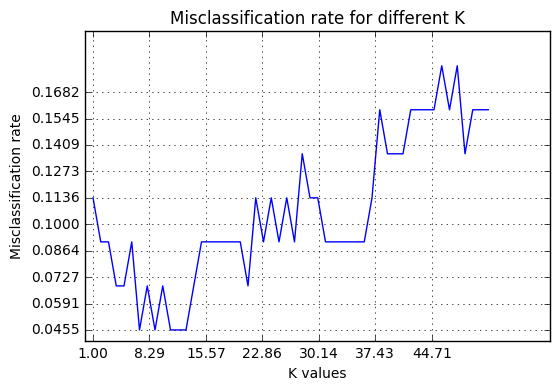

In [60]:
plt.plot(ksample,claError)
plt.xlabel('K values')
plt.ylabel('Misclassification rate')
plt.title('Misclassification rate for different K')
plt.yticks(np.arange(min(claError), max(claError),(max(claError)-min(claError))/10))
plt.xticks(np.arange(min(ksample), max(ksample),(max(ksample)-min(ksample))/7))
plt.grid()
plt.show()


In [45]:
print(ksample)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52]


In [62]:
print(misClasRate([1,1,1],[0,0,1]))

0.6666666666666666


In [64]:
accuracy_score([1,1,1],[0,0,1])

0.33333333333333331